## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [158]:
import pandas as pd #importing required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [159]:
df = pd.read_csv('C:\\Users\\infom\\Documents\\GitHub\\AB_testing\\ab_data.csv') #loading data
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [160]:
df.shape[0] #finding number of rows in a dataset

294478

c. The number of unique users in the dataset.

In [163]:
df['user_id'].nunique()  #Identify the number of unique elements

290584

d. The proportion of users converted.

In [164]:
(df['converted']).mean()   #conversion rate

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [166]:
df.query('(group=="treatment" and landing_page=="old_page") or (group=="control" and landing_page=="new_page")').shape[0]

3893

f. Do any of the rows have missing values?

In [167]:
df.isnull().values.any() #check if the dataset has any null value

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [168]:
d1 = df[(df['group']=='treatment') & (df['landing_page']=='new_page')]    # to create new dataframe
d2 = df[(df['group']=='control') & (df['landing_page']=='old_page')]
df2 = pd.concat([d1,d2])
df2.head(5)

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [112]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [113]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [169]:
df2[df2.duplicated('user_id')]['user_id']  #finding the duplicated users

2893    773192
Name: user_id, dtype: int64

In [170]:
(df2['user_id']==290584).sum()

0

c. What is the row information for the repeat **user_id**? 

In [171]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [172]:
df2.index[df2['user_id'].duplicated()==True].tolist()

[2893]

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [174]:
df2 = df2.drop(df2.index[2893])  #dropped one value of the duplicated value
df2.shape

(290583, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [175]:
df2['converted'].mean()    #convertion rate of people regardless of the page they receive

0.11959749882133504

b. Given that an individual was in the `control` group, what is the probability they converted?

In [176]:
df2[df2['group']=='control']['converted'].mean()  #Probability of the users in control group who coonverted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [177]:
df2[df2['group']=='treatment']['converted'].mean()  #Probability of the users in control group who coonverted

0.11880888313869065

d. What is the probability that an individual received the new page?

In [178]:
(df2['landing_page']=='new_page').mean()    #probability that an individual received the new page

0.50006022375706771

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

****From the above questions and answers we can conclude that the conversion rate of the Control page is more than the Treatment page but this analysis is descriptive and cannot guarantee about the results so we need to perform some more statiscal analysis on this to provide the assurance.****

#### <a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null-hypothesis**
 $H_0:  p_{new} - p_{old} \leq 0$
 
 Which means that the difference between the total population conversion rates of the people with respect to old page and new page is equal to zero ( Which means the conversion rates for the both the page is same) or less than zero which means ( Conversion rate of the people with respect to new age is ittle more).

**Alternative -hypothesis**
 $H_1:  p_{new} - p_{old} > 0$
 
which means that the difference between conversion rate of population with respect to new page and old page is greater than zero which means the conversion rate with respect to new page is greater than old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [123]:
p_new = df2.query('landing_page == "new_page" ')['converted'].mean()
p_new

0.11880806551510564

In [124]:
p_old = df2.query('landing_page == "old_page" ')['converted'].mean()
p_old

0.1203863045004612

As the convert rate is asked to be under the null we need to consider that p_new = p_old and hence we will need to calculate the mean of to values [p_new,p_old]   to calculate the probability under the null.

In [125]:
p_mean = np.mean([p_new, p_old])  

In [126]:
diff = p_new - p_old
diff    #not under null

-0.0015782389853555567

Hence, the alternative hypothesis fails here, So p_new = 0.1188 and p_old = 0.1203 the p_new under the null can be stated as 
p_mean = p_old = p_new : 0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

Following to null hypothesis, p_mean = p_old = p_new : 0.1196 . Hence, p_old = 0.1196

c. What is $n_{new}$?

In [155]:
n_new = df2[df2['group']=='treatment'].shape[0]
n_new

145310

d. What is $n_{old}$?

In [156]:
n_old = df2[df2['group']=='control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [129]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean,(1-p_mean)])
new_page_converted.mean()

0.12040465212304728

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [130]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])
old_page_converted.mean()

0.11918168426559467

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [131]:
act_dif = new_page_converted.mean() - old_page_converted.mean()
act_dif

0.0012229678574526143

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [179]:
p_diffs = []    #simulating the values 10000 times
for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_mean, (1-p_mean)])
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_mean, (1-p_mean)])
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

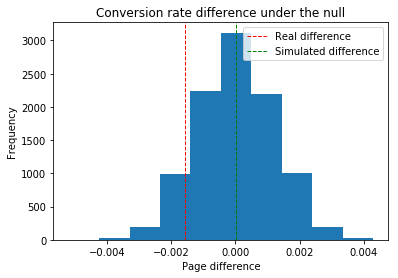

In [180]:
plt.hist(p_diffs);   #plotting histogram of the values in p_diffs
plt.title('Conversion rate difference under the null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(p_new-p_old), color='r', linestyle='dashed', linewidth=1, label="Real difference")
plt.axvline(x=(np.array(p_diffs).mean()), color='g', linestyle='dashed', linewidth=1, label="Simulated difference")
plt.legend()
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [181]:
greater_values = [i for i in p_diffs if i > diff]  #calculating values greater than the actuall diff we calculated before.
actual_diff = len(greater_values)/len(p_diffs)
actual_diff

0.8365

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**So here in part j I computed a p-value which takes into account the mean difference and the variance and also the sample size. The p-value is a measure of how likely you are to get this compound data if no real difference existed. Our p-value is high so there is huge chance of getting this data. Hence, we fail to reject the null and we cant say that there is difference between the people conversion from old page and new page. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [182]:
import statsmodels.api as sm   #stats model is imported to implement OLS and z-test methods

convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
#n_old = df2.query('group == "control" ').shape[0]
#n_new = df2.query('group == "treatment" ').shape[0]
convert_old,convert_new

(17489, 17264)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [138]:
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old])
print("Z-score: ",z_score)
print("P_value: ",p_value)

Z-score:  -1.31092419842
P_value:  0.189883374482


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**a z-score is the number of standard deviations from the mean a data point is. But more technically it's a measure of how many standard deviations below or above the population mean a raw score is.** So from this we can say that the difference between the data points in the histogram is -0.00328 standard deviations below the mean population, and the p-value is 0.1898 which suggests that there is approximately 19% percent chances of existing this condition but this is not enough to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since each row is either conversion or no conversion I will use Logistic Regression in this case.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
df2['intercept'] = 1  #adding intercept column to the dataset
dummy = pd.get_dummies(df['group'])
df2['ab_page'] = dummy['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [40]:
df3 = sm.OLS(df2['converted'], df2[['intercept','ab_page']])  #Implementing OLS model to fit to the regression line.
df3 = df3.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
df3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.719
Date:                Thu, 18 Jan 2018   Prob (F-statistic):              0.190
Time:                        13:53:23   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.311      0.190      -0.004       0.001
==============================================================================
Omnibus:                   125553.456   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.355
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**So the p-value for ab_page here is 0.190 ** which is quiet lower than the p-value calculated before, because In this datafrane I added an intercept column to the dataset which accounts for error. So we can be assured that the value is aproximately equal to the actual.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding another thing that might influence the conversion rate is good option to understand which factors are actually affecting the dependent variable so as we can customize the dependent variable accordingly. Adding extra factors might be provide some misleading insights so we should consider only features which has large impact on the response variable. Features having low impact should not be consider into the modeling. We can identify values having high impact using $R^ 2$ value in regression analysis. If it is high then variable may have high impact on the response variable. 

In this dataset there are timestamp variable which we can use to check its impact on response variable, we might find some relation like if amount of time spend by customer is high then there is possibilty that user liked the page, also the country variable can be analyze the countrywise impact of the page. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [58]:
country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [69]:
dummy = pd.get_dummies(data=country, columns=['country']) #creating dummies for different countries
dummy
new_sf = dummy.merge(df2, on = 'user_id')
new_sf = new_sf[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page','intercept', 'converted',
                 'country_CA', 'country_UK', 'country_US']]
new_sf.head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted,country_CA,country_UK,country_US
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,1,0,0,0,1
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,1,0,0,1,0


In [75]:
logit_countries = sm.Logit(new_sf['converted'],new_sf[['country_UK', 'country_US', 'intercept']]) #to check the impact of categorical values on the convertion
logit_countries = logit_countries.fit()
logit_countries.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Thu, 18 Jan 2018   Pseudo R-squ.:               1.521e-05
Time:                        14:29:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

From the above summary it appears that the country does have some impact on the conversion rate. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [76]:
logit_countries2 = sm.Logit(new_sf['converted'],new_sf[['ab_page', 'country_UK', 'country_US', 'intercept']])
country_effect = logit_countries2.fit()
country_effect.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Jan 2018   Pseudo R-squ.:               2.323e-05
Time:                        14:32:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""

From the above summary we can conclude that after adding new feature to the model there is slight increase in the p-values of the features, which seem to be origin for the impacting factor.

<a id='conclusions'></a>
## Conclusions

So from the overall analysis we can say that the Dataset was enough to perform the required analysis, and from the test conditions we found that there are 50% percent chances of getting either the old or the new page, ans so we ca conclude that the null hypothesis we considered stands true in above case and we dont have enough evidence to reject the null hypothesis, which means that the new page company has launched performed worst when compared to the old page. 

So overall I think company should first consider the factors which have more impact on the page and design the new page considering them as building blocks, and before launching the page make sure the page has all the most impacting things presented in a better way.

### Resources used 


[comprehensive-guide-regression](https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/)

[data-science-ipython-notebooks](https://github.com/donnemartin/data-science-ipython-notebooks)

[adventures-in-statistics-2](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-to-interpret-the-constant-y-intercept)

